<a href="https://colab.research.google.com/github/karolinakuligowska/Projektowanie_systemow_informatycznych/blob/main/PSI_4_Zajecia_Analiza_sentymentu_Slowniki_CSV__Biden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wymagane pakiety

In [1]:
install.packages(c("tm", "tidyverse", "tidytext", "ggplot2", "ggthemes"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘NLP’, ‘slam’, ‘BH’, ‘janeaustenr’, ‘tokenizers’




In [2]:
library(tm)
library(tidyverse)
library(tidytext)
library(ggplot2)
library(ggthemes)

Loading required package: NLP

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::annotate() masks NLP::annotate()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Wczytaj słowniki z plików csv ----

In [3]:
afinn <- read.csv("afinn.csv", stringsAsFactors = FALSE)
bing <- read.csv("bing.csv", stringsAsFactors = FALSE)
loughran <- read.csv("loughran.csv", stringsAsFactors = FALSE)
nrc <- read.csv("nrc.csv", stringsAsFactors = FALSE)

# Jeden cały plik ----

In [4]:
# Wczytanie danych tekstowych
# Odczytanie lokalnego pliku .txt
text <- readLines("Biden2024.txt", encoding="UTF-8")


docs <- VCorpus(VectorSource(text))
tdm <- TermDocumentMatrix(docs)
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)


tokeny <- data.frame(Review = names(v), freq = v, stringsAsFactors = F)
tokeny_data <- as_tibble(tokeny)

#-----------------------------Przed analizą sentymentu ----

In [5]:
# Tokenizacja tekstu przy użyciu pakietu tidytext
# library(tidytext)

# Użycie unnest_tokens()
tidy_tokeny <- tokeny_data %>%
  unnest_tokens(word, Review) # Tworzenie (word) z (Review)

# unnest_tokens() wykonuje czyszczenie
# Usuwa interpunkcję i białe znaki, zamienia tekst na małe litery itp.
# tidy_tokeny
head(tidy_tokeny, 10)


freq,word
<dbl>,<chr>
412,the
274,and
81,that
79,for
60,you
46,not
46,they
42,are
42,with


In [6]:
# Najczęściej występujące słowa to: the, it, and, to...
# Musimy wykonać dodatkowe czyszczenie
# z użyciem listy stopwords

# Użycie anti_join()
#
# Wiersz ramki danych po lewej stronie zostaje zachowany,
# jeśli wartość w dopasowanej kolumnie NIE jest
# obecna w ramce danych po prawej stronie


# Użycie unnest_tokens() z usuwaniem stopwords
tidy_tokeny2 <- tokeny_data %>%
  unnest_tokens(word, Review) %>%
  anti_join(stop_words)

# Liczba słów została zmniejszona
# tidy_tokeny2
head(tidy_tokeny2, 10)

# Sprawdzenie najczęściej występujących słów
# które rzeczywiście odzwierciedlają treść

Joining with `by = join_by(word)`


freq,word
<dbl>,<chr>
32,american
31,i’m
29,it’s
28,that’s
25,people
23,president
22,america
20,future
19,i’ve


# Analiza sentymentu ----

## Analiza sentymentu przy użyciu słownika Loughran ----

Joining with `by = join_by(word)`


freq,word,sentiment
<dbl>,<chr>,<chr>
13,cut,negative
10,law,litigious
8,good,positive
6,against,negative
6,great,positive
5,able,positive
5,believe,uncertainty
5,could,uncertainty
5,crisis,negative


Joining with `by = join_by(word)`


sentiment,n
<chr>,<int>
constraining,5
litigious,18
negative,96
positive,39
uncertainty,19


word,sentiment,n
<chr>,<chr>,<int>
against,negative,3
crisis,negative,3
great,positive,3
law,litigious,3
optimistic,positive,3
possibilities,uncertainty,3
risk,uncertainty,3
best,positive,2
better,positive,2


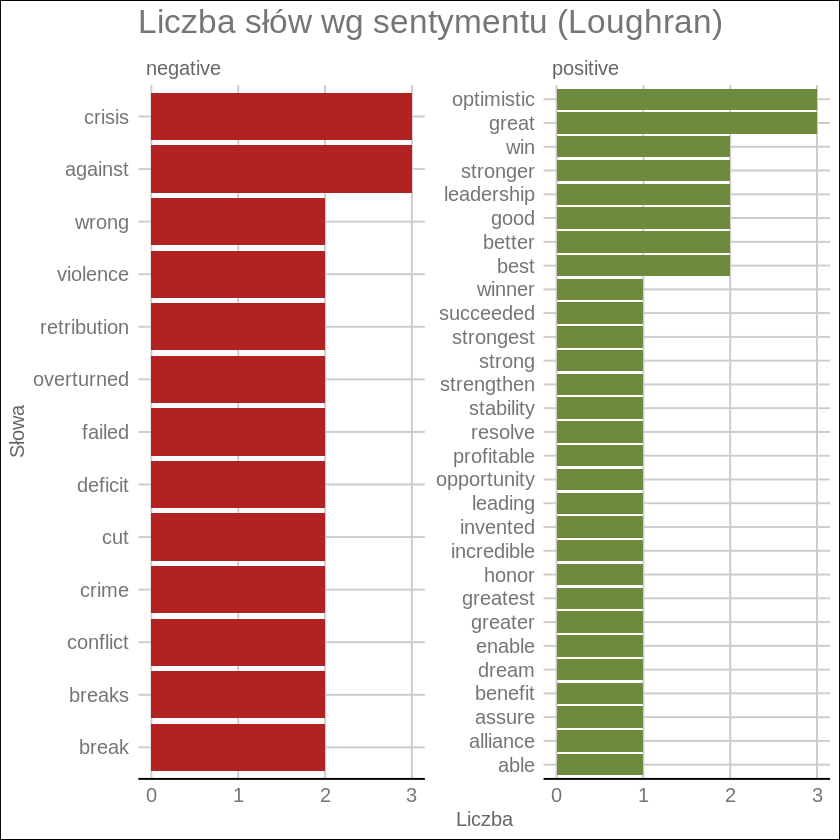

In [7]:
# Użycie inner_join()
tidy_tokeny %>%
  inner_join(loughran, relationship = "many-to-many")
# Liczba słów drastycznie się zmniejszyła,
# ponieważ inner_join zachował tylko te słowa,
# które występowały w słowniku


# Zliczanie sentymentu
sentiment_review <- tidy_tokeny %>%
  inner_join(loughran, relationship = "many-to-many")

sentiment_review %>%
  count(sentiment)

# Zliczanie, które słowa są najczęstsze
# dla danego sentymentu
sentiment_review %>%
  count(word, sentiment) %>%
  arrange(desc(n))


# Filtrowanie analizy sentymentu
# i pozostawienie tylko słów
# o sentymencie pozytywnym lub negatywnym

sentiment_review2 <- sentiment_review %>%
  filter(sentiment %in% c("positive", "negative"))


word_counts <- sentiment_review2 %>%
  count(word, sentiment) %>%
  group_by(sentiment) %>%
  top_n(10, n) %>%
  ungroup() %>%
  mutate(
    word2 = fct_reorder(word, n)
  )

# Wizualizacja sentymentu
ggplot(word_counts, aes(x=word2, y=n, fill=sentiment)) +
  geom_col(show.legend=FALSE) +
  facet_wrap(~sentiment, scales="free") +
  coord_flip() +
  labs(x = "Słowa", y = "Liczba") +
  theme_gdocs() +
  ggtitle("Liczba słów wg sentymentu (Loughran)") +
  scale_fill_manual(values = c("firebrick", "darkolivegreen4"))

## Analiza sentymentu przy użyciu słownika NRC ----

Joining with `by = join_by(word)`


sentiment,n
<chr>,<int>
anger,85
anticipation,99
disgust,47
fear,100
joy,81
negative,174
positive,245
sadness,89
surprise,50


word,sentiment,n
<chr>,<chr>,<int>
congress,disgust,4
congress,trust,4
president,positive,4
president,trust,4
time,anticipation,4
career,anticipation,3
career,positive,3
crisis,negative,3
democracy,positive,3


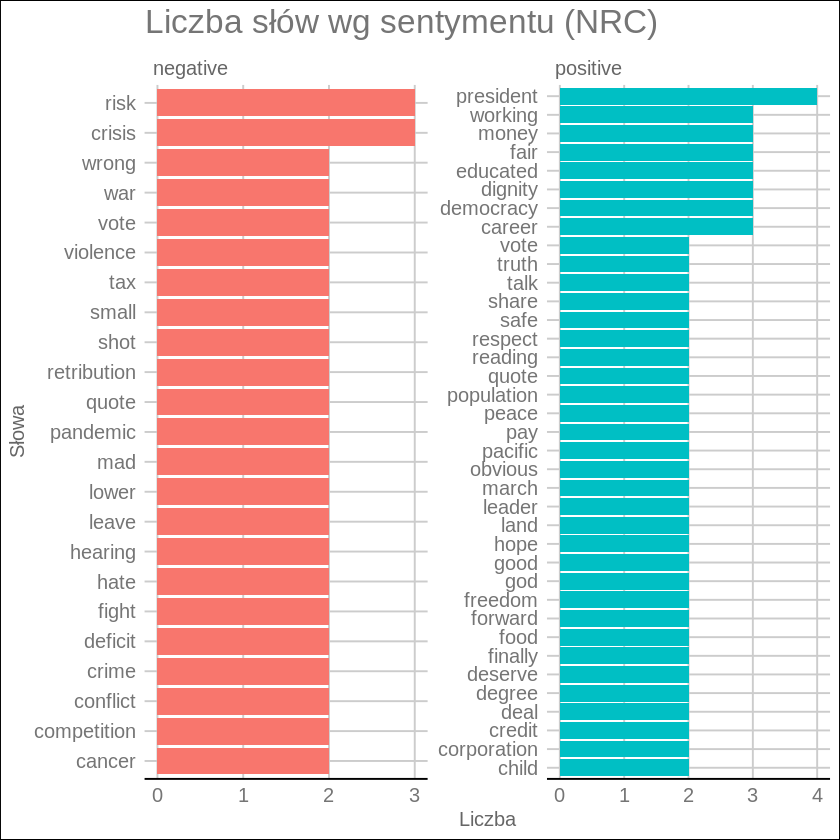

In [8]:
# Zliczanie sentymentu
sentiment_review_nrc <- tidy_tokeny %>%
  inner_join(nrc, relationship = "many-to-many")

sentiment_review_nrc %>%
  count(sentiment)

# Zliczanie, które słowa są najczęstsze
# dla danego sentymentu
sentiment_review_nrc %>%
  count(word, sentiment) %>%
  arrange(desc(n))


# Filtrowanie analizy sentymentu
# i pozostawienie tylko słów
# o sentymencie pozytywnym lub negatywnym

sentiment_review_nrc2 <- sentiment_review_nrc %>%
  filter(sentiment %in% c("positive", "negative"))


word_counts_nrc2 <- sentiment_review_nrc2 %>%
  count(word, sentiment) %>%
  group_by(sentiment) %>%
  top_n(10, n) %>%
  ungroup() %>%
  mutate(
    word2 = fct_reorder(word, n)
  )

# Wizualizacja sentymentu
ggplot(word_counts_nrc2, aes(x=word2, y=n, fill=sentiment)) +
  geom_col(show.legend=FALSE) +
  facet_wrap(~sentiment, scales="free") +
  coord_flip() +
  labs(x = "Słowa", y = "Liczba") +
  theme_gdocs() +
  ggtitle("Liczba słów wg sentymentu (NRC)")

## Analiza sentymentu przy użyciu słownika Bing ----

Joining with `by = join_by(word)`


sentiment,n
<chr>,<int>
negative,118
positive,140


word,sentiment,n
<chr>,<chr>,<int>
right,positive,5
crisis,negative,3
dignity,positive,3
educated,positive,3
fair,positive,3
great,positive,3
optimistic,positive,3
risk,negative,3
wealthy,positive,3


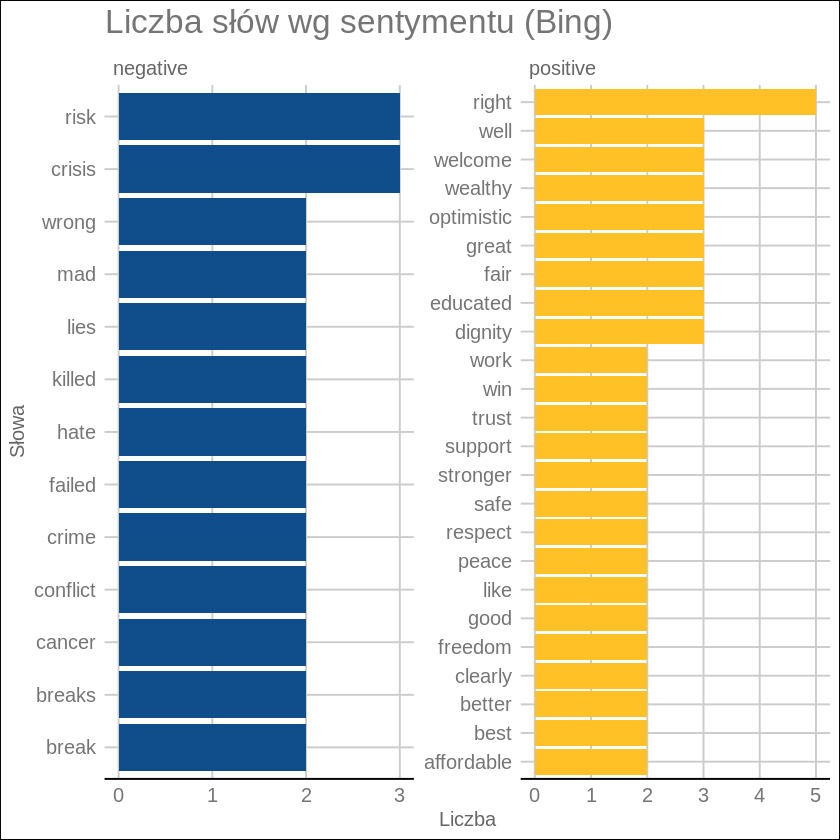

In [9]:
# Zliczanie sentymentu
sentiment_review_bing <- tidy_tokeny %>%
  inner_join(bing)

sentiment_review_bing %>%
  count(sentiment)

# Zliczanie, które słowa są najczęstsze
# dla danego sentymentu
sentiment_review_bing %>%
  count(word, sentiment) %>%
  arrange(desc(n))


# Filtrowanie analizy sentymentu
# i pozostawienie tylko słów
# o sentymencie pozytywnym lub negatywnym

sentiment_review_bing2 <- sentiment_review_bing %>%
  filter(sentiment %in% c("positive", "negative"))


word_counts_bing2 <- sentiment_review_bing2 %>%
  count(word, sentiment) %>%
  group_by(sentiment) %>%
  top_n(10, n) %>%
  ungroup() %>%
  mutate(
    word2 = fct_reorder(word, n)
  )

# Wizualizacja sentymentu
ggplot(word_counts_bing2, aes(x=word2, y=n, fill=sentiment)) +
  geom_col(show.legend=FALSE) +
  facet_wrap(~sentiment, scales="free") +
  coord_flip() +
  labs(x = "Słowa", y = "Liczba") +
  theme_gdocs() +
  ggtitle("Liczba słów wg sentymentu (Bing)") +
  scale_fill_manual(values = c("dodgerblue4", "goldenrod1"))

## Analiza sentymentu przy użyciu słownika Afinn ----

Joining with `by = join_by(word)`


value,n
<int>,<int>
-4,2
-3,28
-2,52
-1,43
1,54
2,75
3,15
4,5


word,value,n
<chr>,<int>,<int>
no,-1,4
crisis,-3,3
fair,2,3
great,3,3
optimistic,2,3
risk,-2,3
stop,-1,3
want,1,3
wealthy,2,3


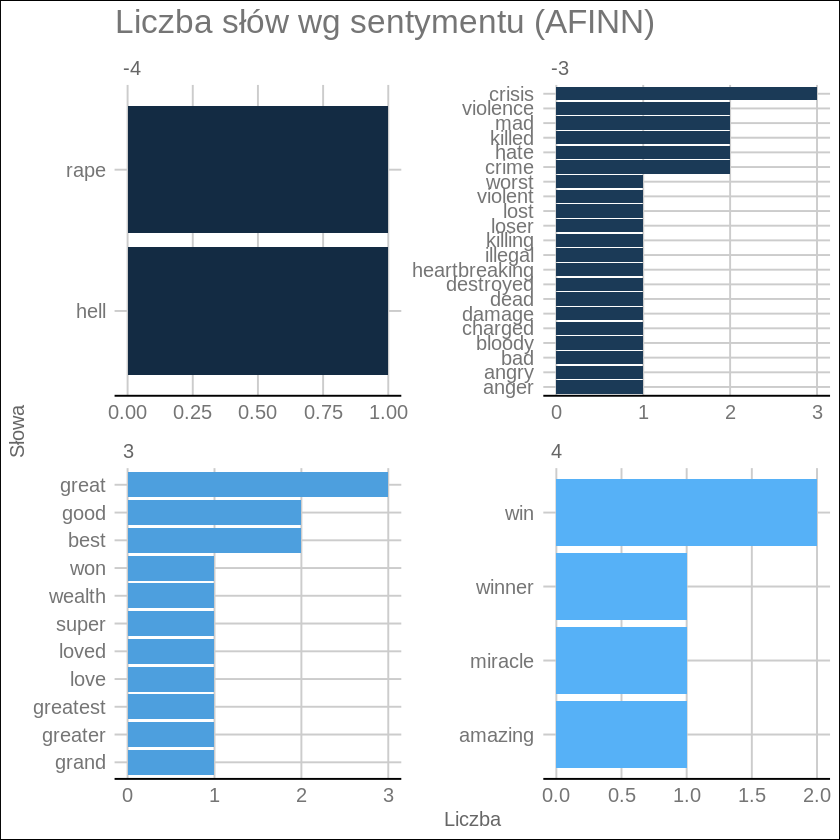

In [10]:
# Zliczanie sentymentu
sentiment_review_afinn <- tidy_tokeny %>%
  inner_join(afinn)

sentiment_review_afinn %>%
  count(value)

# Zliczanie, które słowa są najczęstsze
# dla danego sentymentu
sentiment_review_afinn %>%
  count(word, value) %>%
  arrange(desc(n))


# Silnie pozytywne lub silnie negatywne słowa:
# filtrowanie analizy sentymentu
# i pozostawienie tylko słów o wartości w zakresie od -5 do 5

sentiment_review_afinn3 <- sentiment_review_afinn %>%
  filter(value %in% c("3", "-3" , "4", "-4", "5", "-5"))


word_counts_afinn3 <- sentiment_review_afinn3 %>%
  count(word, value) %>%
  group_by(value) %>%
  top_n(10, n) %>%
  ungroup() %>%
  mutate(
    word2 = fct_reorder(word, n)
  )

# Wizualizacja sentymentu
ggplot(word_counts_afinn3, aes(x=word2, y=n, fill=value)) +
  geom_col(show.legend=FALSE) +
  facet_wrap(~value, scales="free") +
  coord_flip() +
  labs(x = "Słowa", y = "Liczba") +
  theme_gdocs() +
  ggtitle("Liczba słów wg sentymentu (AFINN)")